In [1]:

# Objective: Compare the fund portfolio to market and draw efficient frontier.
import datetime as dt
import pandas as pd
import numpy as np
# For download stock data
import yfinance as yf
# For plotting
#import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.colors as plc

In [2]:
# Parameters
start = dt.datetime(2019, 1, 1) # Back-test start date (5 years)
end = dt.datetime(2022, 10, 21) # Back-test end date
risk_free_rate = 0.02 # Risk free rate (%) # For calc Sharpe ratio
tickers = ['VFIAX','VMLTX','0P0001FD85.HK'] # Portfolio selections
#markets = ['^GSPC', 'TFI','Money'] # For benchmark comparsion

In [3]:
# Get stock data from yahoo
stock_data = pd.DataFrame()
stock_data = pd.read_csv('data.csv')
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%Y-%m-%d')
stock_data.set_index('Date', inplace=True)

In [4]:
stock_data.head()

,VFIAX,VMLTX,0P0001FD85.HK
Date,,,
2019-01-02 00:00:00-05:00,217.532135,10.257153,1001.260010
2019-01-03 00:00:00-05:00,212.209534,10.266587,1001.333984
2019-01-04 00:00:00-05:00,219.494110,10.266587,1001.405029
2019-01-07 00:00:00-05:00,221.033600,10.266587,1001.617004
2019-01-08 00:00:00-05:00,223.173935,10.266587,1001.703979


<AxesSubplot:xlabel='Date'>

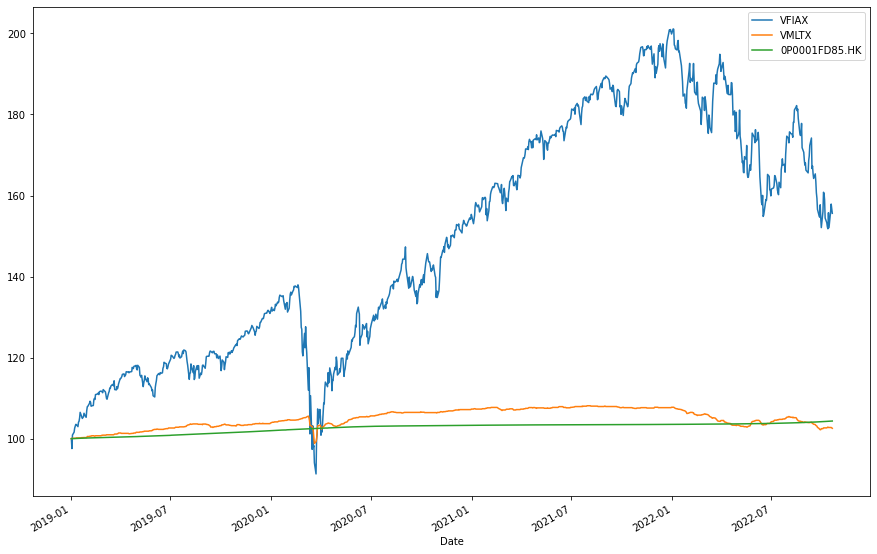

In [5]:
# Plot the performance of the portfolio
(stock_data / stock_data.iloc[0]*100).plot(figsize=(15,10))

In [6]:
# Get return
stock_returns = stock_data.pct_change().dropna()
#stock_returns.index.strftime('%Y-%m-%d')
stock_returns.tail()

,VFIAX,VMLTX,0P0001FD85.HK
Date,,,
2022-10-14 00:00:00-04:00,-0.023611,0.000000,0.000085
2022-10-17 00:00:00-04:00,0.026480,0.000000,0.000240
2022-10-18 00:00:00-04:00,0.011426,0.000000,0.000081
2022-10-19 00:00:00-04:00,-0.006667,-0.000949,0.000082
2022-10-20 00:00:00-04:00,-0.007855,-0.000950,0.000080


In [7]:
# Return mean of each stock (Annualized)
#log_returns = np.log(stock_data/stock_data.shift(1))
ann_returns = stock_returns.mean() * 250 # Annualized
ann_returns

VFIAX            0.141542
VMLTX            0.006863
0P0001FD85.HK    0.011121
dtype: float64

In [8]:
# Covariance (Annualized)
stock_returns.cov() * 250

,VFIAX,VMLTX,0P0001FD85.HK
VFIAX,0.051967,1.154637e-03,-1.908192e-06
VMLTX,0.001155,5.202268e-04,4.275612e-07
0P0001FD85.HK,-0.000002,4.275612e-07,6.903038e-07


In [9]:
# Correlation of each stock
stock_returns.corr()

,VFIAX,VMLTX,0P0001FD85.HK
VFIAX,1.000000,0.222067,-0.010075
VMLTX,0.222067,1.000000,0.022562
0P0001FD85.HK,-0.010075,0.022562,1.000000


In [10]:
# Draw Efficient frontier
portfolio_returns = []
portfolio_volatilities = []
np.random.seed(50)
# Pick 1000 random sample 
for x in range(1000):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    
    portfolio_returns.append(np.sum(weights * stock_returns.mean()) * 250)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(stock_returns.cov() * 250, weights))))
                    
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)
# Get dataframe for plot graph
portfolios = pd.DataFrame({'Return':portfolio_returns, 'Volatility':portfolio_volatilities})

In [11]:
# Partition the chart by client risk level
levels = 5
bounds = []
step = (portfolios.Volatility.max() - portfolios.Volatility.min())/levels
for i in range(0,levels+1):
    bounds.append(portfolios.Volatility.min() + (step*i))

In [12]:
# Add colors on each level
colors = ["green", "cyan", "blue", "orange", "red"]
cmap = plc.ListedColormap(colors)
norm = plc.BoundaryNorm(bounds, len(colors))

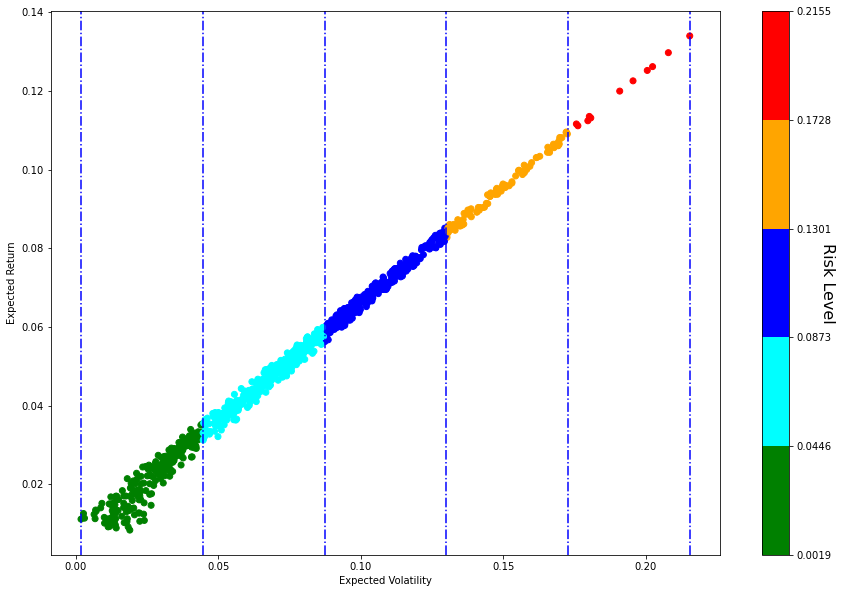

In [13]:
# Plotting using pyplot
fig, ax = plt.subplots(figsize = (15, 10))
sc = ax.scatter(portfolios.Volatility, portfolios.Return, c=portfolios.Volatility, cmap=cmap, norm=norm)
cbar = fig.colorbar(sc, spacing="proportional")
cbar.ax.set_ylabel('Risk Level', rotation=270, fontsize=16)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

#fit = np.polyfit(portfolios.Volatility, portfolios.Return, deg=1)
#ax.plot(portfolios.Volatility, np.poly1d(fit)(portfolios.Volatility), color="k")
for i in range(len(bounds)):
    plt.axvline(x = bounds[i], color = 'b', linestyle='-.', label = 'axvline - full height')

plt.show()

In [14]:
# Client risk level
portfolios.loc[(portfolios.Volatility>=0.15145) & (portfolios.Volatility<=0.153)]

,Return,Volatility
371,0.095914,0.152123


In [97]:
# Client risk level 4 's portfolio weight: 
((0.095914 - 0.006863)/(0.141542 - 0.006863))

0.661209245687895

In [15]:
pf_weights = [0.61, 0.29, 0.1] # Portfolio weight for benchmark (-0.5 for each ratio)

In [16]:
market_data = pd.read_csv('market.csv')
market_data['Date'] = pd.to_datetime(market_data['Date'], format='%Y-%m-%d')
market_data.set_index('Date', inplace=True)

In [17]:
market_data.head()

,^GSPC,TFI,Money_mkt
Date,,,
2019-01-02 00:00:00-05:00,2510.030029,44.735126,0.1
2019-01-03 00:00:00-05:00,2447.889893,44.827965,0.1
2019-01-04 00:00:00-05:00,2531.939941,44.688713,0.1
2019-01-07 00:00:00-05:00,2549.689941,44.698002,0.1
2019-01-08 00:00:00-05:00,2574.409912,44.679432,0.1


In [18]:
market_returns = market_data.pct_change().dropna()
#stock_returns.index.strftime('%Y-%m-%d')

In [102]:
market_returns.head()

,^GSPC,TFI,Money_mkt
Date,,,
2019-01-03 00:00:00-05:00,-0.024757,0.002075,0.0
2019-01-04 00:00:00-05:00,0.034336,-0.003106,0.0
2019-01-07 00:00:00-05:00,0.007010,0.000208,0.0
2019-01-08 00:00:00-05:00,0.009695,-0.000415,0.0
2019-01-09 00:00:00-05:00,0.004098,-0.000831,0.0


In [19]:
# Calc the market return on given weights
mkt_returns = market_returns.iloc[:,0].mul(pf_weights[0]).add(market_returns.iloc[:,1].mul(pf_weights[1])).to_frame('Return')
mkt_returns.tail()

,Return
Date,
2022-10-14 00:00:00-04:00,-0.014041
2022-10-17 00:00:00-04:00,0.016284
2022-10-18 00:00:00-04:00,0.007886
2022-10-19 00:00:00-04:00,-0.005113
2022-10-20 00:00:00-04:00,-0.006355


In [20]:
# Calc the portfolio return on given weights
pf_returns = stock_returns.iloc[:,0].mul(pf_weights[0]).add(stock_returns.iloc[:,1].mul(pf_weights[1])).to_frame('Return')
pf_returns.tail()

,Return
Date,
2022-10-14 00:00:00-04:00,-0.014403
2022-10-17 00:00:00-04:00,0.016153
2022-10-18 00:00:00-04:00,0.006970
2022-10-19 00:00:00-04:00,-0.004342
2022-10-20 00:00:00-04:00,-0.005067


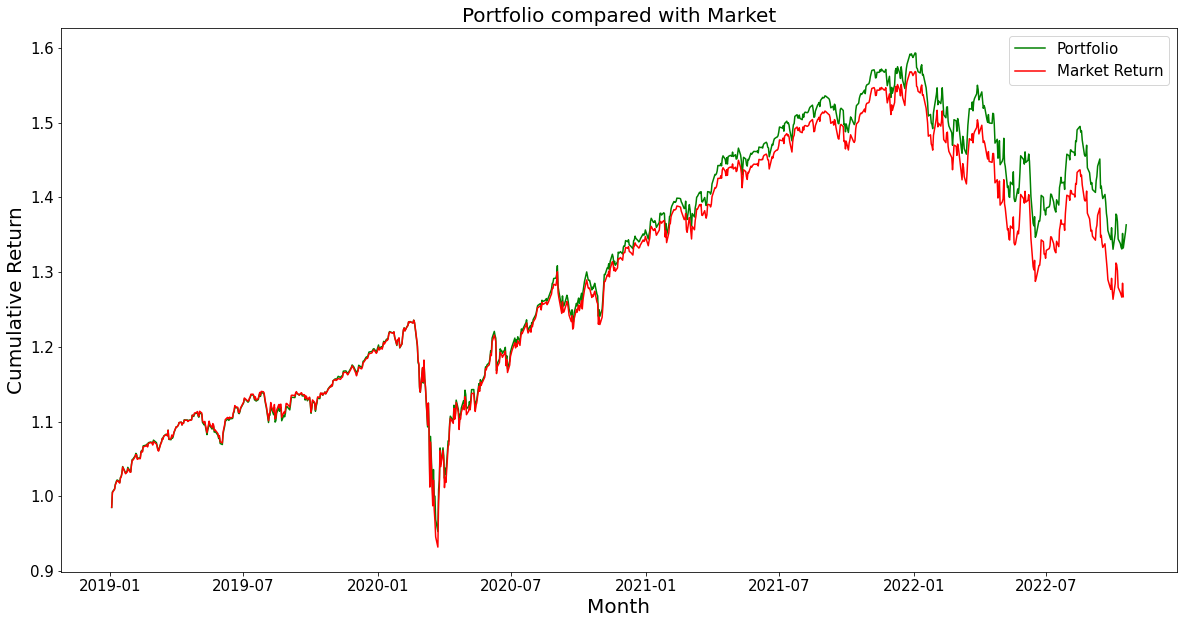

In [21]:
# Plot the performance chart
fig, ax = plt.subplots(figsize = (20, 10))
plt.plot((1 + pf_returns['Return']).cumprod()[:-2], color = 'g')
plt.plot((1 + mkt_returns['Return'][:-2]).cumprod()[:-2], color = 'r')
plt.title('Portfolio compared with Market', fontsize = 20)
plt.ylabel('Cumulative Return', fontsize = 20)
plt.xlabel('Month', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax.legend(['Portfolio', 'Market Return'], fontsize = 15)
#plt.subplots_adjust(top = 0.92, bottom = 0.1, left = 0.08, right = 0.94)
plt.show()

In [24]:
# Calc the portfolio return on given weights
pf_tt_returns1 = stock_returns.iloc[:,0].mul(pf_weights[0])
pf_tt_returns2 = stock_returns.iloc[:,1].mul(pf_weights[1])
pf_tt_returns3 = stock_returns.iloc[:,2].mul(pf_weights[2])

# Total portfolio returns
pf_tt_returns = pf_tt_returns1 + pf_tt_returns2 + pf_tt_returns3

In [25]:
# Portfolio's fund weighted return 
pf_tt_returns1.mean() * 250

0.08944306939625606

In [31]:
# Each fund annuaklized return (0 - Equity, 1 - Bond, 2 - Cash)
stock_returns.iloc[:,0].mean() * 250

0.14154203247511887

(array([  1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   1.,   3.,   1.,   2.,   2.,   4.,  10.,  12.,
         14.,  25.,  30.,  68., 111., 189., 189., 117.,  77.,  46.,  23.,
         14.,   4.,   5.,   0.,   1.,   2.,   0.,   0.,   1.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   2.]),
 array([-0.07356838, -0.07091733, -0.06826629, -0.06561524, -0.0629642 ,
        -0.06031315, -0.05766211, -0.05501106, -0.05236002, -0.04970897,
        -0.04705792, -0.04440688, -0.04175583, -0.03910479, -0.03645374,
        -0.0338027 , -0.03115165, -0.02850061, -0.02584956, -0.02319852,
        -0.02054747, -0.01789643, -0.01524538, -0.01259434, -0.00994329,
        -0.00729225, -0.0046412 , -0.00199016,  0.00066089,  0.00331194,
         0.00596298,  0.00861403,  0.01126507,  0.01391612,  0.01656716,
         0.01921821,  0.02186925,  0.0245203 ,  0.02717134,  0.02982239,
         0.03247343,  0.03512448,  0.03777552,  0.04042657,  0.04307761,
 

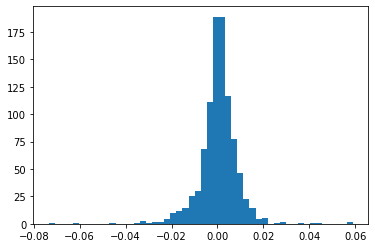

In [26]:
# Plot the distribution of portfolio returns
plt.hist(pf_tt_returns, 50)

In [27]:
# Calc the percentile of 1,3,5 years
# Portfolio std dev annualized (5 yr)
pf_tt_returns.std() * np.sqrt(250)

0.14067359936493218

In [229]:
# Portfolio mean annualized (5 yr)
pf_tt_returns.mean() * 250

0.08944306939625606

In [230]:
# Portfolio mean annualized (3 yr)
pf_tt_returns3y = pf_tt_returns.iloc[-750:]
pf_tt_returns3y.mean() * 250

0.06713818930135074

In [231]:
# Portfolio std dev annualized (3 yr)
pf_tt_returns3y.std() * np.sqrt(250)

0.1531962560980869

In [29]:
# Portfolio mean annualized (1 yr)
pf_tt_returns1y = pf_tt_returns.iloc[-250:]
pf_tt_returns1y.mean() * 250

-0.11925781046975913

In [30]:
# Portfolio std dev annualized (1 yr)
pf_tt_returns1y.std() * np.sqrt(250)

0.1391789898805151

In [33]:
percentile_index = [10,25,50,75,90]

In [34]:
# Calc the percentile
# 5 years
perc5 = [np.percentile(pf_tt_returns, i, method='nearest') for i in percentile_index]
[i*250 for i in perc5]

[-1.9805106279143985,
 -0.7650042782462307,
 0.18560658245075023,
 1.1299070215195761,
 2.1838200556216463]

In [201]:
# 1 year
pf_tt_returns1 = pf_tt_returns.iloc[-250:]
perc1 = [np.percentile(pf_tt_returns1y, i, method='nearest') for i in percentile_index]
[i*250 for i in perc1]

[-2.866425845088178,
 -1.3482816852148594,
 -0.15086097230546686,
 1.4381373389083345,
 2.8487037408835754]

In [202]:
# 3 years
pf_tt_returns3 = pf_tt_returns.iloc[-750:]
perc3 = [np.percentile(pf_tt_returns3y, i, method='nearest') for i in percentile_index]
[i*250 for i in perc3]

[-2.304040432118085,
 -0.9076170261734674,
 0.16273195303649235,
 1.1994459142655371,
 2.3289593593914457]

In [197]:
# Calc annualized standard deviation of each fund
stock_returns.iloc[:,0].std() * np.sqrt(250)

0.2279631900707231

In [198]:
stock_returns.iloc[:,1].std() * np.sqrt(250)

0.02280848001525922

In [199]:
stock_returns.iloc[:,2].std() * np.sqrt(250)

0.0008308452169545679